<a href="https://colab.research.google.com/github/alchemy110/DeepLearning_Practical/blob/main/Copy_of_CNN(opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, Model
from tensorflow.keras import Input
from tensorflow.keras.utils  import to_categorical
import numpy as np
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [2]:
%%capture
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images = train_images.reshape(60000, 28, 28)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.reshape(10000, 28, 28)
test_images = test_images.astype("float32") / 255.0

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_labels.shape

(10000, 10)

In [21]:
inp = Input(shape=(28, 28, 1))
x = layers.Conv2D(32,(3, 3), padding='same', kernel_regularizer=l2(0.001))(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64,(3 ,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x= layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu',kernel_regularizer =l2(0.001))(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        1849

In [22]:
from tensorflow.keras import optimizers
from  tensorflow.keras.optimizers  import  Adam
model_cnn.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [23]:
history2 = model_cnn.fit (train_images, train_labels,
                         epochs=30, batch_size=512,
                         validation_data=(test_images, test_labels))

Epoch 1/30
118/118 [==============================] - 4s 20ms/step - loss: 0.7883 - accuracy: 0.7745 - val_loss: 2.3452 - val_accuracy: 0.7038
Epoch 2/30
118/118 [==============================] - 2s 17ms/step - loss: 0.4861 - accuracy: 0.8612 - val_loss: 2.0878 - val_accuracy: 0.8192
Epoch 3/30
118/118 [==============================] - 2s 17ms/step - loss: 0.4166 - accuracy: 0.8820 - val_loss: 1.2838 - val_accuracy: 0.8436
Epoch 4/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3775 - accuracy: 0.8926 - val_loss: 0.5762 - val_accuracy: 0.8940
Epoch 5/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3525 - accuracy: 0.8973 - val_loss: 0.3970 - val_accuracy: 0.9000
Epoch 6/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3251 - accuracy: 0.9050 - val_loss: 0.3298 - val_accuracy: 0.9033
Epoch 7/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3059 - accuracy: 0.9090 - val_loss: 0.3182 - val_accuracy: 0.9057

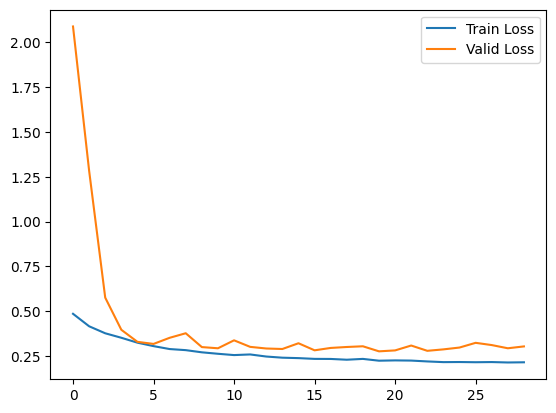

In [24]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'][1:], label='Train Loss')
plt.plot(history2.history['val_loss'][1:], label='Valid Loss')
plt.legend()

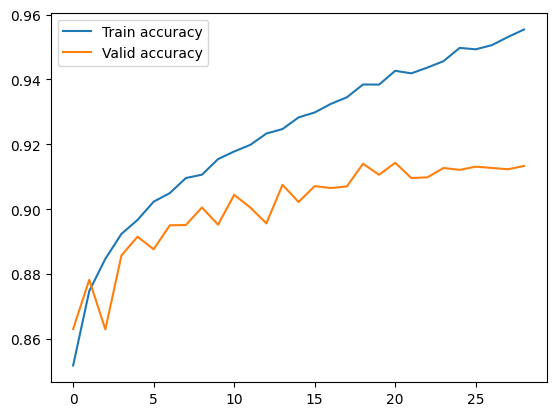

In [ ]:
plt.plot(history2.history['accuracy'][1:], label='Train accuracy')
plt.plot(history2.history['val_accuracy'][1:], label='Valid accuracy')
plt.legend()

In [ ]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Valid Loss')
plt.legend()

313/313 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.9133


[0.2581343650817871, 0.9132999777793884]

In [ ]:
pred_mlp = model_mlp.predict(X_test1)
pred_cnn = model_cnn.predict(X_test2)